Software Developer Job Market Prediction

Edgar Acosta

Purpose: To provide a detailed report of the current job market(regarding AI and Data Analytics) and to explore why I cannot obtain a job straight out of university.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io

ds1_raw = "https://raw.githubusercontent.com/eracosta-codes/EdgarPortfolioDataScience/6361e57ae1cc2d94c144786d94e842a58818549e/ai_job_dataset.csv"

jobs_dataset = pd.read_csv(ds1_raw)

In [2]:
jobs_dataset

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,AI14996,Robotics Engineer,38604,USD,EN,FL,Finland,S,Finland,50,"Java, Kubernetes, Azure",Bachelor,1,Energy,2025-02-06,2025-03-25,1635,7.9,Advanced Robotics
14996,AI14997,Machine Learning Researcher,57811,GBP,EN,CT,United Kingdom,M,United Kingdom,0,"Mathematics, Docker, SQL, Deep Learning",Master,0,Government,2024-10-16,2024-10-30,1624,8.2,Smart Analytics
14997,AI14998,NLP Engineer,189490,USD,EX,CT,South Korea,L,South Korea,50,"Scala, Spark, NLP",Associate,17,Manufacturing,2024-03-19,2024-05-02,1336,7.4,AI Innovations
14998,AI14999,Head of AI,79461,EUR,EN,FT,Netherlands,M,Netherlands,0,"Java, Computer Vision, Python, TensorFlow",PhD,1,Real Estate,2024-03-22,2024-04-23,1935,5.6,Smart Analytics


Based on the above results right away, since only a single dataset is being worked on(and not multiple as if it were a database), job_id will be immediately discarded(otherwise, it would serve as a primary key as it would be crucial for a database relationship diagram). 

Constraints:
Since I live in Canada, I have a Bachelor's Degree, and only two months of hands on work experience, data analytics and software development jobs(what I am currently looking for) in Canada(employee residence, companies can hire in any country), that are available for Entry Level, with years of experience 1 or less, and only require a Bachelor's degree will be selected.
This would be done by querying the table. 

However, first, some data cleaning:

In [3]:
jobs_dataset = jobs_dataset.drop(['job_id','posting_date','application_deadline'], axis=1)

In [4]:
jobs_dataset

,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,job_description_length,benefits_score,company_name
0,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,1076,5.9,Smart Analytics
1,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,1268,5.2,TechCorp Inc
2,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,1974,9.4,Autonomous Tech
3,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,1345,8.6,Future Systems
4,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,1989,6.6,Advanced Robotics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Robotics Engineer,38604,USD,EN,FL,Finland,S,Finland,50,"Java, Kubernetes, Azure",Bachelor,1,Energy,1635,7.9,Advanced Robotics
14996,Machine Learning Researcher,57811,GBP,EN,CT,United Kingdom,M,United Kingdom,0,"Mathematics, Docker, SQL, Deep Learning",Master,0,Government,1624,8.2,Smart Analytics
14997,NLP Engineer,189490,USD,EX,CT,South Korea,L,South Korea,50,"Scala, Spark, NLP",Associate,17,Manufacturing,1336,7.4,AI Innovations
14998,Head of AI,79461,EUR,EN,FT,Netherlands,M,Netherlands,0,"Java, Computer Vision, Python, TensorFlow",PhD,1,Real Estate,1935,5.6,Smart Analytics


In [5]:
jobs_dataset.describe()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,1503.314733,7.504273
std,60260.940438,40.812712,5.545768,576.127083,1.450870
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


In [6]:
jobs_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_title               15000 non-null  object 
 1   salary_usd              15000 non-null  int64  
 2   salary_currency         15000 non-null  object 
 3   experience_level        15000 non-null  object 
 4   employment_type         15000 non-null  object 
 5   company_location        15000 non-null  object 
 6   company_size            15000 non-null  object 
 7   employee_residence      15000 non-null  object 
 8   remote_ratio            15000 non-null  int64  
 9   required_skills         15000 non-null  object 
 10  education_required      15000 non-null  object 
 11  years_experience        15000 non-null  int64  
 12  industry                15000 non-null  object 
 13  job_description_length  15000 non-null  int64  
 14  benefits_score          15000 non-null

There are no non-null objects

Check for type consistency

In [7]:
attributes = ['job_title', 'salary_usd','salary_currency', 'experience_level', 'employment_type', 'company_location', 'company_size','employee_residence', 'remote_ratio', 'required_skills','education_required','years_experience', 'industry','job_description_length','benefits_score','company_name']


In [8]:
nullData = jobs_dataset.isna()
print('Null Data:\n')
for col in attributes:
    nullItem = nullData.loc[(nullData[col] == True)]
    print(col + ':  ' + str(len(nullItem)))


Null Data:

job_title:  0
salary_usd:  0
salary_currency:  0
experience_level:  0
employment_type:  0
company_location:  0
company_size:  0
employee_residence:  0
remote_ratio:  0
required_skills:  0
education_required:  0
years_experience:  0
industry:  0
job_description_length:  0
benefits_score:  0
company_name:  0


In [9]:
exactDupCheck = jobs_dataset.duplicated()
exactDupList = exactDupCheck.values.tolist()

n = 0

for i in exactDupList:
    if i != False:
        n += 1   
print('Amount of duplicated Rows: ' + str(n))

Amount of duplicated Rows: 0


In [10]:
#Outlier detection for salary:

salary_data = jobs_dataset['salary_usd']

Q1 = salary_data.quantile(0.25)
Q3 = salary_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

salary_outliers = salary_data[(salary_data < lower_bound) | (salary_data > upper_bound)]
lower_salary_outliers = salary_data[salary_data < lower_bound]
higher_salary_outliers = salary_data[salary_data > upper_bound]

print(f'Number of outliers: {len(salary_outliers)}')
print(f'Number of lower outliers: {len(lower_salary_outliers)}')
print(f'Number of higher outliers: {len(higher_salary_outliers)}')


Number of outliers: 483
Number of lower outliers: 0
Number of higher outliers: 483


In [11]:
print(salary_outliers.min())
print(salary_outliers.max())
salary_outliers

261046
399095


48       288815
67       316182
79       284486
98       290199
137      324557
          ...  
14916    307237
14917    273053
14956    292760
14977    325968
14983    288661
Name: salary_usd, Length: 483, dtype: int64

In [12]:
jobs_dataset.loc[salary_outliers.index, 'salary_usd'] = np.nan


In [13]:
jobs_dataset

,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,job_description_length,benefits_score,company_name
0,AI Research Scientist,90376.0,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,1076,5.9,Smart Analytics
1,AI Software Engineer,61895.0,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,1268,5.2,TechCorp Inc
2,AI Specialist,152626.0,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,1974,9.4,Autonomous Tech
3,NLP Engineer,80215.0,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,1345,8.6,Future Systems
4,AI Consultant,54624.0,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,1989,6.6,Advanced Robotics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Robotics Engineer,38604.0,USD,EN,FL,Finland,S,Finland,50,"Java, Kubernetes, Azure",Bachelor,1,Energy,1635,7.9,Advanced Robotics
14996,Machine Learning Researcher,57811.0,GBP,EN,CT,United Kingdom,M,United Kingdom,0,"Mathematics, Docker, SQL, Deep Learning",Master,0,Government,1624,8.2,Smart Analytics
14997,NLP Engineer,189490.0,USD,EX,CT,South Korea,L,South Korea,50,"Scala, Spark, NLP",Associate,17,Manufacturing,1336,7.4,AI Innovations
14998,Head of AI,79461.0,EUR,EN,FT,Netherlands,M,Netherlands,0,"Java, Computer Vision, Python, TensorFlow",PhD,1,Real Estate,1935,5.6,Smart Analytics


In [14]:
jobs_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_title               15000 non-null  object 
 1   salary_usd              14517 non-null  float64
 2   salary_currency         15000 non-null  object 
 3   experience_level        15000 non-null  object 
 4   employment_type         15000 non-null  object 
 5   company_location        15000 non-null  object 
 6   company_size            15000 non-null  object 
 7   employee_residence      15000 non-null  object 
 8   remote_ratio            15000 non-null  int64  
 9   required_skills         15000 non-null  object 
 10  education_required      15000 non-null  object 
 11  years_experience        15000 non-null  int64  
 12  industry                15000 non-null  object 
 13  job_description_length  15000 non-null  int64  
 14  benefits_score          15000 non-null

Now that the outliers are removed, replace using K-Nearest_Neighbours model

In [15]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
salary_array = imputer.fit_transform(jobs_dataset[['salary_usd']])
jobs_dataset['salary_usd'] = salary_array

In [16]:
jobs_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_title               15000 non-null  object 
 1   salary_usd              15000 non-null  float64
 2   salary_currency         15000 non-null  object 
 3   experience_level        15000 non-null  object 
 4   employment_type         15000 non-null  object 
 5   company_location        15000 non-null  object 
 6   company_size            15000 non-null  object 
 7   employee_residence      15000 non-null  object 
 8   remote_ratio            15000 non-null  int64  
 9   required_skills         15000 non-null  object 
 10  education_required      15000 non-null  object 
 11  years_experience        15000 non-null  int64  
 12  industry                15000 non-null  object 
 13  job_description_length  15000 non-null  int64  
 14  benefits_score          15000 non-null

The outliers are successfully replaced using an AI model

First, let's see what the table would look like if only Canadian jobs were included

In [25]:
canada_dataset =  jobs_dataset.loc[(jobs_dataset['employee_residence'] == 'Canada')]

In [26]:
canada_dataset

,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,job_description_length,benefits_score,company_name
55,AI Architect,88470.000000,USD,MI,PT,Canada,L,Canada,0,"Azure, Kubernetes, TensorFlow, Statistics, Spark",Associate,3,Real Estate,1528,9.1,Autonomous Tech
63,AI Software Engineer,99972.000000,USD,MI,PT,Australia,M,Canada,50,"Java, R, Deep Learning, NLP, Azure",PhD,4,Technology,799,6.5,Cloud AI Solutions
67,Machine Learning Engineer,109246.604533,USD,EX,PT,Denmark,M,Canada,0,"Python, Scala, Statistics, Git",Associate,12,Finance,2452,7.0,Digital Transformation LLC
76,AI Product Manager,213783.000000,USD,EX,FT,Canada,S,Canada,100,"Kubernetes, Spark, Statistics, Scala",Bachelor,16,Energy,2383,9.2,Quantum Computing Inc
82,Machine Learning Researcher,207548.000000,USD,EX,CT,Canada,M,Canada,0,"NLP, Azure, Spark, Data Visualization",PhD,10,Energy,2292,6.7,Cognitive Computing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,AI Specialist,62597.000000,USD,EN,CT,Canada,L,Canada,50,"Computer Vision, Java, Mathematics, PyTorch",Master,1,Gaming,2053,9.2,TechCorp Inc
14884,AI Architect,122867.000000,USD,SE,FT,Canada,L,Canada,50,"Tableau, Kubernetes, Linux, Spark",Bachelor,7,Gaming,2330,8.0,Digital Transformation LLC
14906,AI Software Engineer,78344.000000,USD,MI,CT,Canada,S,Canada,50,"Java, Scala, R",PhD,3,Gaming,2023,7.5,Quantum Computing Inc
14949,AI Product Manager,160601.000000,USD,EX,CT,Canada,M,Canada,100,"AWS, SQL, Spark, Python, Git",Master,10,Real Estate,857,5.4,Cognitive Computing


In Data Science class, it was taught that a sample of >=1000 would be ideal but sometimes we would use samples of >=500

Now narrow the data to Bachelor's degree only

In [30]:
canada_bachelor_dataset = canada_dataset.loc[(canada_dataset['education_required'] == 'Bachelor')]
canada_bachelor_dataset

,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,job_description_length,benefits_score,company_name
76,AI Product Manager,213783.0,USD,EX,FT,Canada,S,Canada,100,"Kubernetes, Spark, Statistics, Scala",Bachelor,16,Energy,2383,9.2,Quantum Computing Inc
90,Research Scientist,48466.0,USD,EN,PT,Canada,S,Canada,100,"Hadoop, Spark, Kubernetes, Python",Bachelor,0,Automotive,1146,5.7,Predictive Systems
161,Research Scientist,153040.0,USD,SE,CT,Canada,L,Canada,50,"SQL, Tableau, Statistics, GCP",Bachelor,7,Manufacturing,1112,8.2,Autonomous Tech
186,AI Product Manager,116704.0,USD,MI,CT,Canada,L,Canada,100,"SQL, PyTorch, NLP, Data Visualization",Bachelor,2,Finance,1540,9.8,Autonomous Tech
196,Principal Data Scientist,49644.0,USD,EN,CT,China,L,Canada,100,"Linux, PyTorch, TensorFlow, Azure, Python",Bachelor,0,Finance,2266,5.5,Future Systems
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14683,AI Consultant,157177.0,USD,EX,CT,Canada,L,Canada,50,"Kubernetes, Python, MLOps",Bachelor,16,Real Estate,1440,9.1,Smart Analytics
14750,AI Consultant,74830.0,USD,EN,CT,Canada,M,Canada,100,"Docker, PyTorch, Mathematics, Python, SQL",Bachelor,0,Real Estate,2384,5.6,Digital Transformation LLC
14751,Robotics Engineer,149819.0,USD,EX,FL,Canada,S,Canada,0,"Git, AWS, Spark, Computer Vision",Bachelor,14,Media,929,5.8,Algorithmic Solutions
14805,ML Ops Engineer,248665.0,USD,EX,CT,United States,M,Canada,50,"Mathematics, SQL, Java, Python, Tableau",Bachelor,15,Technology,809,9.5,Machine Intelligence Group


It is important to note that many people on this dataset did not obtain these jobs straight out of university(like how I am trying to do). There are people with over a decade of work experience. For my purposes, only people with one year or less work experience and entry will be considered regardless of the employment_type.

In [33]:
canada_bachelor_dataset.loc[(jobs_dataset["experience_level"] == 'EN')]

,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,job_description_length,benefits_score,company_name
90,Research Scientist,48466.0,USD,EN,PT,Canada,S,Canada,100,"Hadoop, Spark, Kubernetes, Python",Bachelor,0,Automotive,1146,5.7,Predictive Systems
196,Principal Data Scientist,49644.0,USD,EN,CT,China,L,Canada,100,"Linux, PyTorch, TensorFlow, Azure, Python",Bachelor,0,Finance,2266,5.5,Future Systems
700,ML Ops Engineer,43910.0,USD,EN,FL,Finland,S,Canada,50,"GCP, Python, Azure, Linux, Deep Learning",Bachelor,0,Finance,1501,6.7,Predictive Systems
825,Principal Data Scientist,36696.0,USD,EN,PT,Japan,M,Canada,0,"R, Spark, PyTorch, Java, Linux",Bachelor,1,Media,1868,10.0,Cloud AI Solutions
1004,AI Specialist,68130.0,USD,EN,PT,Canada,S,Canada,0,"Git, Python, AWS",Bachelor,1,Consulting,1586,8.0,TechCorp Inc
1069,ML Ops Engineer,80426.0,USD,EN,FL,Canada,L,Canada,0,"Azure, Mathematics, PyTorch",Bachelor,0,Real Estate,530,6.3,DataVision Ltd
1324,AI Specialist,51178.0,USD,EN,CT,Japan,S,Canada,0,"SQL, Docker, Python, Java",Bachelor,0,Media,1415,7.6,Neural Networks Co
1557,AI Software Engineer,44119.0,USD,EN,FT,Canada,S,Canada,100,"Kubernetes, MLOps, NLP",Bachelor,0,Gaming,1110,9.2,Digital Transformation LLC
2481,Autonomous Systems Engineer,52050.0,USD,EN,CT,Canada,M,Canada,50,"Java, SQL, Mathematics, Docker, Computer Vision",Bachelor,1,Finance,1802,7.2,Smart Analytics
2644,AI Product Manager,49061.0,USD,EN,FT,Canada,M,Canada,50,"Azure, Linux, PyTorch",Bachelor,1,Healthcare,952,6.1,Advanced Robotics


In [36]:
print(len(canada_bachelor_dataset.loc[(jobs_dataset["experience_level"] == 'EN')]))

44


This is a very narrow scope. These are entry level jobs for people who just got out of university. Notice how all the employees in this dataset have 1 year or less of work experience

In [37]:
canada_bachelor_dataset.loc[(jobs_dataset["years_experience"] <= 1)]

,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,job_description_length,benefits_score,company_name
90,Research Scientist,48466.0,USD,EN,PT,Canada,S,Canada,100,"Hadoop, Spark, Kubernetes, Python",Bachelor,0,Automotive,1146,5.7,Predictive Systems
196,Principal Data Scientist,49644.0,USD,EN,CT,China,L,Canada,100,"Linux, PyTorch, TensorFlow, Azure, Python",Bachelor,0,Finance,2266,5.5,Future Systems
700,ML Ops Engineer,43910.0,USD,EN,FL,Finland,S,Canada,50,"GCP, Python, Azure, Linux, Deep Learning",Bachelor,0,Finance,1501,6.7,Predictive Systems
825,Principal Data Scientist,36696.0,USD,EN,PT,Japan,M,Canada,0,"R, Spark, PyTorch, Java, Linux",Bachelor,1,Media,1868,10.0,Cloud AI Solutions
1004,AI Specialist,68130.0,USD,EN,PT,Canada,S,Canada,0,"Git, Python, AWS",Bachelor,1,Consulting,1586,8.0,TechCorp Inc
1069,ML Ops Engineer,80426.0,USD,EN,FL,Canada,L,Canada,0,"Azure, Mathematics, PyTorch",Bachelor,0,Real Estate,530,6.3,DataVision Ltd
1324,AI Specialist,51178.0,USD,EN,CT,Japan,S,Canada,0,"SQL, Docker, Python, Java",Bachelor,0,Media,1415,7.6,Neural Networks Co
1557,AI Software Engineer,44119.0,USD,EN,FT,Canada,S,Canada,100,"Kubernetes, MLOps, NLP",Bachelor,0,Gaming,1110,9.2,Digital Transformation LLC
2481,Autonomous Systems Engineer,52050.0,USD,EN,CT,Canada,M,Canada,50,"Java, SQL, Mathematics, Docker, Computer Vision",Bachelor,1,Finance,1802,7.2,Smart Analytics
2644,AI Product Manager,49061.0,USD,EN,FT,Canada,M,Canada,50,"Azure, Linux, PyTorch",Bachelor,1,Healthcare,952,6.1,Advanced Robotics


In [38]:
print(len(canada_bachelor_dataset.loc[(jobs_dataset["years_experience"] <= 1)]))

44


The same employees that have one or less years of work experience are also all the employees that are in entry level

Now, the one big query. Some changes, Full time is preferred and any job title would do

In [ ]:
optimized_dataset = jobs_dataset.loc[(jobs_dataset["experience_level"] == 'EN') & (jobs_dataset['employment_type'] == 'FT') & (jobs_dataset['employee_residence'] == 'Canada') & (jobs_dataset['education_required'] == 'Bachelor') & (jobs_dataset['years_experience'] <= 1)]

Now, let's create some graphs to visualize AI employment in Canada using the canada_dataset, and the dataset below

In [46]:
bachelor_wage = (np.array(canada_bachelor_dataset['salary_usd']).tolist())
canada_associate_dataset = canada_dataset.loc[(canada_dataset['education_required'] == 'Associate')]
associate_wage = (np.array(canada_associate_dataset['salary_usd']).tolist())
canada_master_dataset = canada_dataset.loc[(canada_dataset['education_required'] == 'Master')]
master_wage = (np.array(canada_master_dataset['salary_usd']).tolist())
canada_phd_dataset = canada_dataset.loc[(canada_dataset['education_required'] == 'PhD')]
phd_wage = (np.array(canada_phd_dataset['salary_usd']).tolist())

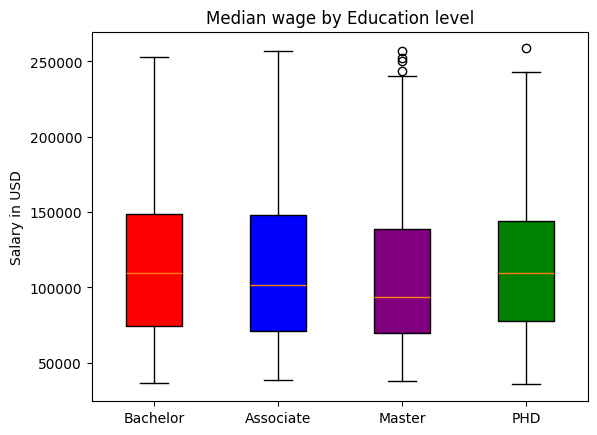

In [47]:
education_levels = [
    bachelor_wage,
    associate_wage,
    master_wage,
    phd_wage
]
labels = ['Bachelor', 'Associate', 'Master', 'PHD']
colors = ['red', 'blue', 'purple','green']

fig, ax = plt.subplots()
ax.set_ylabel('Salary in USD')
ax.set_title("Median wage by Education level")

bplot = ax.boxplot(education_levels,
                   patch_artist=True,  # fill with color
                   tick_labels=labels)  # will be used to label x-ticks

# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

Using the Canada dataset, it seems that Bachelor's has a higher median wage(50% percentile) than the rest of the other degrees while Associate's as a higher 75% percentile. Masters' having the lowest median wage also has outliers, could this mean that there is an increased level of income inequality among earners who have a Master's degree? Although PHD and Bachelor's have a similar median wage, through an economic lens(since schooling is expensive), why bother go through extra schooling(assuming if one only completed their Bachelor's) if one would earn as much as a PHD graduate, and if one were in between Bachelors and PHD, one could earn less(or possibly more if you are an outlier or at the 75th percentile, but that sounds like a gamble). 

Using the Canada dataset, create a scatterplot with wages versus years of experience

In [48]:
canada_wage = (np.array(canada_dataset['salary_usd']).tolist())
canada_experience = (np.array(canada_dataset['years_experience']).tolist())

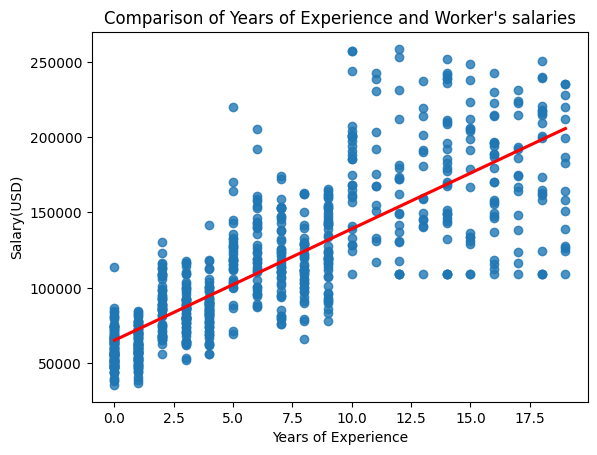

In [49]:
sns.regplot(x=canada_experience, y=canada_wage, ci=None, line_kws={"color": "red"})
plt.xlabel('Years of Experience')
plt.ylabel('Salary(USD)')
plt.title('Comparison of Years of Experience and Worker\'s salaries')
plt.show()

There seems to be a positive correlation between the amount of years an employee has worked, and their salary. What matters more than a degree > Bachelor's is the amount of work experience one may have.

Let us see the distribution of employees by years of experience

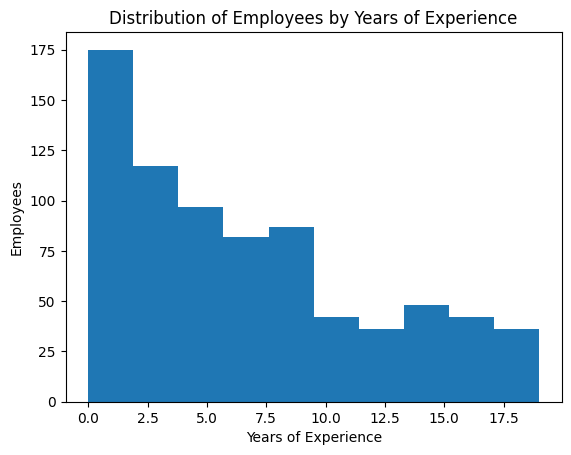

In [50]:
ax = plt.hist(canada_experience)
plt.title("Distribution of Employees by Years of Experience")
plt.xlabel('Years of Experience')
plt.ylabel('Employees')

plt.show()

Although it seems that a greater share of employees have less years of work experience, it is important to note that the experience level may vary.

A Bar graph outlining Employees and their experience levels will be displayed below:

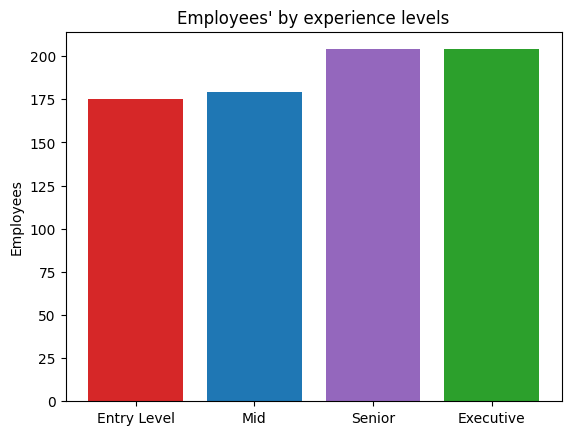

In [54]:
fig, ax = plt.subplots()

credit = ['Entry Level', 'Mid', 'Senior', 'Executive']
counts = [(canada_dataset['experience_level'] == 'EN').sum(),
    (canada_dataset['experience_level'] == 'MI').sum(),
    (canada_dataset['experience_level'] == 'SE').sum(),
    (canada_dataset['experience_level'] == 'EX').sum()
]
bar_labels = ['red', 'blue','purple', 'green']
bar_colors = ['tab:red', 'tab:blue', 'tab:purple', 'tab:green']

ax.bar(credit, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Employees')
ax.set_title('Employees\' by experience levels')
plt.show()

The experience level with the least amount of employees are entry level employees, while senior and executives have roughly the same amount of employees.

Finally, a pie graph outlining the amount of employees per university degree

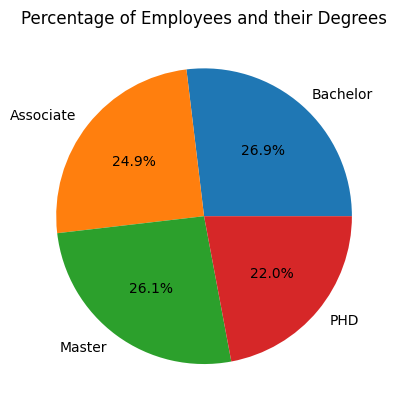

In [56]:
labels = 'Bachelor', 'Associate', 'Master', 'PHD'
sizes = [(canada_dataset['education_required'] == 'Bachelor').sum(),
    (canada_dataset['education_required'] == 'Associate').sum(),
    (canada_dataset['education_required'] == 'Master').sum(),
    (canada_dataset['education_required'] == 'PhD').sum()]

fig, ax = plt.subplots()
ax.set_title('Percentage of Employees and their Degrees')
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

A plurality of Employees only have a Bachelor's

The graphs above do not show information specific to those who were employed straight out of University

Below will be shown queried tables that will show information that is narrowed down to show information regarding employment of people who came straight from University

In [22]:
optimized_dataset

,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,job_description_length,benefits_score,company_name
1557,AI Software Engineer,44119.0,USD,EN,FT,Canada,S,Canada,100,"Kubernetes, MLOps, NLP",Bachelor,0,Gaming,1110,9.2,Digital Transformation LLC
2644,AI Product Manager,49061.0,USD,EN,FT,Canada,M,Canada,50,"Azure, Linux, PyTorch",Bachelor,1,Healthcare,952,6.1,Advanced Robotics
4309,Autonomous Systems Engineer,66792.0,USD,EN,FT,Canada,S,Canada,50,"Python, Linux, TensorFlow, MLOps",Bachelor,0,Automotive,1000,9.9,Future Systems
4444,NLP Engineer,51089.0,USD,EN,FT,Canada,M,Canada,0,"Computer Vision, Scala, Linux, PyTorch, Statis...",Bachelor,0,Technology,1647,5.0,Quantum Computing Inc
4653,Head of AI,72743.0,USD,EN,FT,Canada,L,Canada,0,"Java, Kubernetes, Scala",Bachelor,1,Manufacturing,599,7.9,Digital Transformation LLC
4989,Autonomous Systems Engineer,58368.0,USD,EN,FT,China,L,Canada,50,"Linux, Data Visualization, Azure, Java",Bachelor,0,Gaming,591,9.1,Machine Intelligence Group
10847,Machine Learning Researcher,61844.0,USD,EN,FT,Canada,S,Canada,0,"Git, Kubernetes, Statistics, Hadoop, Python",Bachelor,1,Energy,1398,8.2,Advanced Robotics
12612,Head of AI,52027.0,USD,EN,FT,Canada,S,Canada,50,"Azure, Python, TensorFlow",Bachelor,0,Energy,1515,7.2,TechCorp Inc
12613,Principal Data Scientist,60171.0,USD,EN,FT,Canada,S,Canada,0,"GCP, Git, Kubernetes, PyTorch, Azure",Bachelor,1,Technology,1620,7.3,Advanced Robotics
13129,AI Specialist,62357.0,USD,EN,FT,United States,S,Canada,50,"Linux, Kubernetes, TensorFlow",Bachelor,0,Automotive,1797,8.2,DeepTech Ventures


In [28]:
print(len(optimized_dataset))

12


In [40]:
to_analyze = canada_bachelor_dataset.loc[(jobs_dataset["years_experience"] <= 1)]
to_analyze

,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,job_description_length,benefits_score,company_name
90,Research Scientist,48466.0,USD,EN,PT,Canada,S,Canada,100,"Hadoop, Spark, Kubernetes, Python",Bachelor,0,Automotive,1146,5.7,Predictive Systems
196,Principal Data Scientist,49644.0,USD,EN,CT,China,L,Canada,100,"Linux, PyTorch, TensorFlow, Azure, Python",Bachelor,0,Finance,2266,5.5,Future Systems
700,ML Ops Engineer,43910.0,USD,EN,FL,Finland,S,Canada,50,"GCP, Python, Azure, Linux, Deep Learning",Bachelor,0,Finance,1501,6.7,Predictive Systems
825,Principal Data Scientist,36696.0,USD,EN,PT,Japan,M,Canada,0,"R, Spark, PyTorch, Java, Linux",Bachelor,1,Media,1868,10.0,Cloud AI Solutions
1004,AI Specialist,68130.0,USD,EN,PT,Canada,S,Canada,0,"Git, Python, AWS",Bachelor,1,Consulting,1586,8.0,TechCorp Inc
1069,ML Ops Engineer,80426.0,USD,EN,FL,Canada,L,Canada,0,"Azure, Mathematics, PyTorch",Bachelor,0,Real Estate,530,6.3,DataVision Ltd
1324,AI Specialist,51178.0,USD,EN,CT,Japan,S,Canada,0,"SQL, Docker, Python, Java",Bachelor,0,Media,1415,7.6,Neural Networks Co
1557,AI Software Engineer,44119.0,USD,EN,FT,Canada,S,Canada,100,"Kubernetes, MLOps, NLP",Bachelor,0,Gaming,1110,9.2,Digital Transformation LLC
2481,Autonomous Systems Engineer,52050.0,USD,EN,CT,Canada,M,Canada,50,"Java, SQL, Mathematics, Docker, Computer Vision",Bachelor,1,Finance,1802,7.2,Smart Analytics
2644,AI Product Manager,49061.0,USD,EN,FT,Canada,M,Canada,50,"Azure, Linux, PyTorch",Bachelor,1,Healthcare,952,6.1,Advanced Robotics


Given these tables, how does someone who barely had any work experience and only had a Bachelor's degree obtain job titles that contain words such as "Manager", "Head", "Principal", "ML Ops"(Considering how DevOps is required first). Was nepotism involved? What happened? Aren't people supposed to start first with Analyst jobs? or Junior development jobs? Universities do not teach Docker(I learned it myself), nor do they teach Kubernetes. I keep applying everywhere and somehow people with a similar job experience and education are employed. 